In [1]:
import numpy as np
import random
from pylab import *
%matplotlib inline

In [2]:
import data

/home/alex/anaconda3/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [23]:
df_nodes = data.luna16_get_df_nodes() 
df_nodes = df_nodes[(df_nodes["diameter_mm"]>6)]
patient_ids = data.luna16_get_patient_ids()
vsize = np.asarray([32,32,32])

In [24]:
segmentation_results = [] 

df = df_nodes
for idx in range(len(df_nodes)):
    #print(idx)
    pid = df_nodes.iloc[idx]["pid"]
    image = data.luna16_get_image(pid)
    segmented_image = data.luna16_get_segmented_image(pid)
    info = data.luna16_get_info(pid)

    node_x = df["coordX"].values[idx]
    node_y = df["coordY"].values[idx]
    node_z = df["coordZ"].values[idx]
    diam = df["diameter_mm"].values[idx]

    center = np.array([node_z,node_y,node_x])  #nodule center
    origin = np.array(info["origin"]) #x,y,z  Origin in world coordinates (mm)
    spacing = np.array(info["spacing_1mm"])# spacing of voxels in world coor. (mm)
    # c =np.rint((center-origin)/spacing)  # nodule center in voxel space
    # c = c.astype(np.int)
    pos = ((center-origin)/spacing - vsize/2)
    pos = np.rint(pos).astype(np.int)

    s = (slice(pos[0], pos[0]+vsize[0]), slice(pos[1], pos[1]+vsize[1]), slice(pos[2], pos[2]+vsize[2]))
    volume = image[s]
    segmented_volume = segmented_image[s]
    
    if volume.shape != (32,32,32):
        continue
    mask = data.compose_make_mask(vsize, diam=diam+2, sigma=1)
    segmentation_results.append( np.sum(segmented_volume*mask) / np.sum(mask) )

## Diameter > 6mm

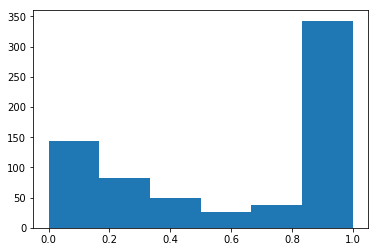

In [26]:
h = hist(segmentation_results, bins=6)

## Diameter > 12mm

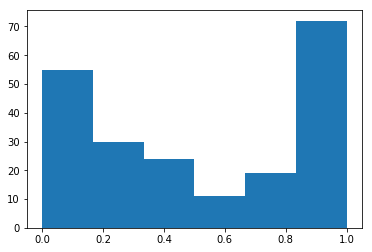

In [22]:
h = hist(segmentation_results, bins=6)